In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [126]:
data = pd.read_csv('data/titanic/train.csv',usecols=['Survived','Age','Fare'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [127]:
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [128]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [129]:
data.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [130]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


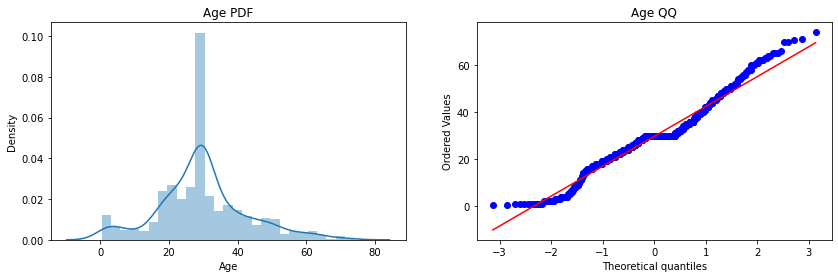

In [132]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ")

plt.show()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


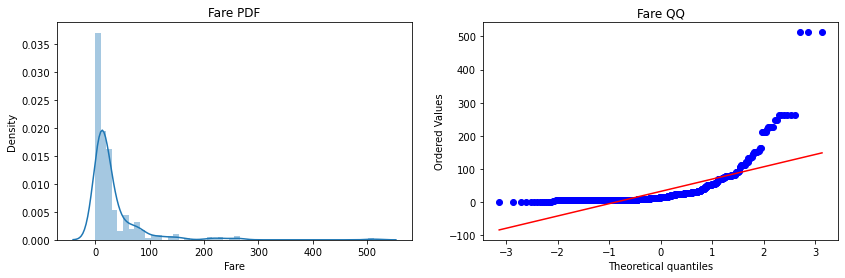

In [133]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ")

plt.show()

In [134]:
lr = LogisticRegression()
clf = RandomForestClassifier()

In [135]:
lr.fit(X_train,y_train)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
y_pred_lr = lr.predict(X_test)
y_pred_clf = clf.predict(X_test)

print("Accuracy Score of LR model ", accuracy_score(y_test,y_pred_lr)*100)
print("Accuracy score of CLF model ", accuracy_score(y_test,y_pred_clf)*100)

Accuracy Score of LR model  70.0
Accuracy score of CLF model  66.66666666666666


In [137]:
cv_score_lr = cross_val_score(lr,X,y,cv=10,scoring='accuracy')
cv_score_clf = cross_val_score(clf,X,y,cv=10,scoring='accuracy')

print("Accuracy Score of Cross Validated LR model ", cv_score_lr.mean()*100)
print("Accuracy score of Cross Validated CLF model ", cv_score_clf.mean()*100)

Accuracy Score of Cross Validated LR model  65.89013732833958
Accuracy score of Cross Validated CLF model  66.22471910112361


# FunctionTransformer(func = ?) 
   * log1p - log transform for right skewed  ,
   * 1/x - reciprocal transform ,
   * x**2 - square transform for left skewed ,
   * x**1/2 - square root tranform
   * custom function can also be implemented (sin, cos etc...)

In [138]:
trf = FunctionTransformer(func=np.log1p)

In [139]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.fit_transform(X_test)

In [140]:
lr.fit(X_train_trans,y_train)
clf.fit(X_train_trans,y_train)

RandomForestClassifier()

In [141]:
y_pred_lr_trans = lr.predict(X_test_trans)
y_pred_clf_trans = clf.predict(X_test_trans)

print("Accuracy Score of Transformed LR model ", accuracy_score(y_test,y_pred_lr_trans)*100)
print("Accuracy score of Transformed CLF model ", accuracy_score(y_test,y_pred_clf_trans)*100)

Accuracy Score of Transformed LR model  68.88888888888889
Accuracy score of Transformed CLF model  64.44444444444444


In [142]:
X_trans = trf.fit_transform(X)

cv_score_lr_trans = cross_val_score(lr,X_trans,y,cv=10,scoring='accuracy')
cv_score_clf_trans = cross_val_score(clf,X_trans,y,cv=10,scoring='accuracy')

print("Accuracy Score of Cross Validated Transformed LR model ", cv_score_lr_trans.mean()*100)
print("Accuracy score of Cross Validated Transformed CLF model ", cv_score_clf_trans.mean()*100)

Accuracy Score of Cross Validated Transformed LR model  67.80274656679151
Accuracy score of Cross Validated Transformed CLF model  67.12359550561797


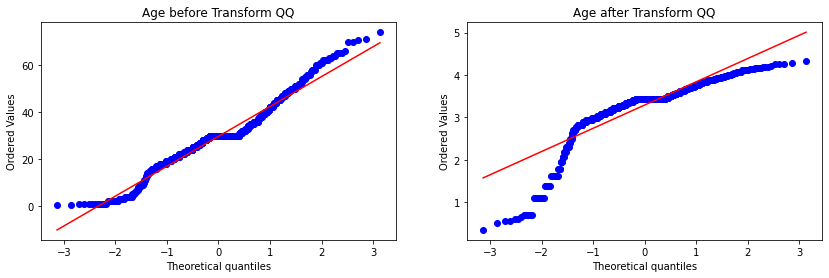

In [143]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age before Transform QQ")


plt.subplot(122)
stats.probplot(X_train_trans['Age'], dist='norm', plot=plt)
plt.title("Age after Transform QQ")

plt.show()

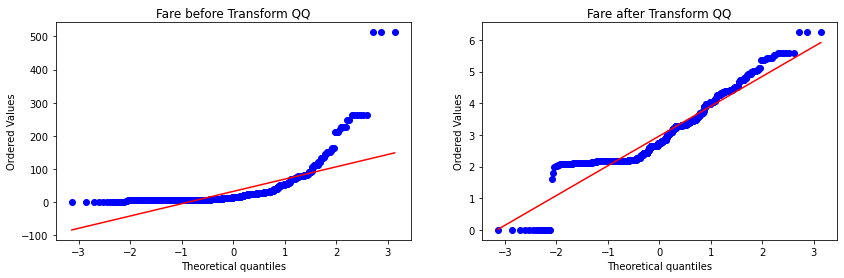

In [144]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare before Transform QQ")


plt.subplot(122)
stats.probplot(X_train_trans['Fare'], dist='norm', plot=plt)
plt.title("Fare after Transform QQ")

plt.show()

In [145]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(func=np.log1p),['Fare'])],
    remainder='passthrough')

In [146]:
X_train_trans2 = trf2.fit_transform(X_train)
X_test_trans2 = trf2.fit_transform(X_test)

In [147]:
lr.fit(X_train_trans2,y_train)
clf.fit(X_train_trans2,y_train)

RandomForestClassifier()

In [148]:
y_pred_lr_trans2 = lr.predict(X_test_trans2)
y_pred_clf_trans2 = clf.predict(X_test_trans2)

In [149]:
print("Accuracy Score of Transformed LR model ", accuracy_score(y_test,y_pred_lr_trans2)*100)
print("Accuracy score of Transformed CLF model ", accuracy_score(y_test,y_pred_clf_trans2)*100)

Accuracy Score of Transformed LR model  68.88888888888889
Accuracy score of Transformed CLF model  66.66666666666666


In [150]:
X_trans2 = trf2.fit_transform(X)

cv_score_lr_trans2 = cross_val_score(lr,X_trans2,y,cv=10,scoring='accuracy')
cv_score_clf_trans2 = cross_val_score(clf,X_trans2,y,cv=10,scoring='accuracy')

print("Accuracy Score of Cross Validated Transformed LR model ", cv_score_lr_trans2.mean()*100)
print("Accuracy score of Cross Validated Transformed CLF model ", cv_score_clf_trans2.mean()*100)

Accuracy Score of Cross Validated Transformed LR model  67.12609238451937
Accuracy score of Cross Validated Transformed CLF model  68.80774032459425


# PowerTransformer

In [174]:
from sklearn.preprocessing import PowerTransformer

In [175]:
data = pd.read_csv('data/concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [176]:
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [177]:
X = data.drop("Strength", axis=1)
y = data["Strength"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test) 
print("R2 score without transformation ",r2_score(y_test,y_pred))

R2 score without transformation  0.5165949085879336


In [179]:
cv_score_lr = cross_val_score(lr,X,y,cv=10,scoring='r2')
print("Cross Validated R2 score without transformation ",cv_score_lr.mean())

Cross Validated R2 score without transformation  0.27820729160873797


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


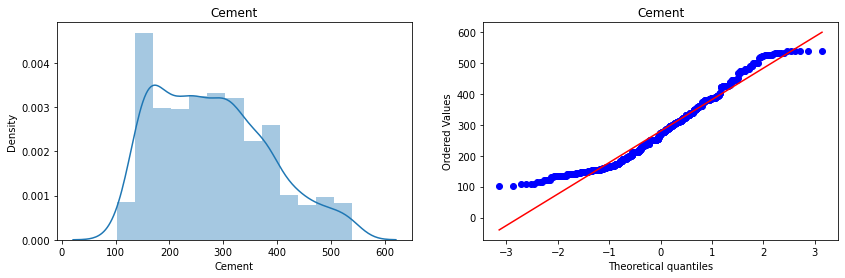

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


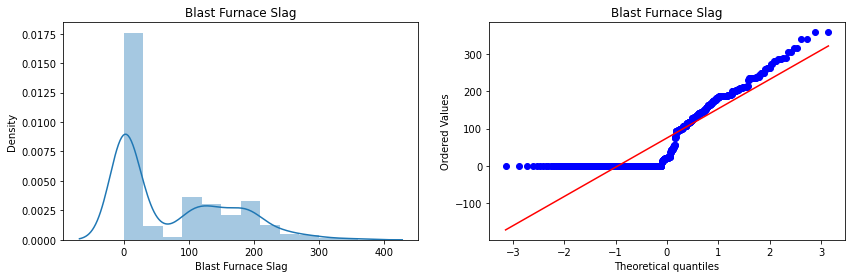

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


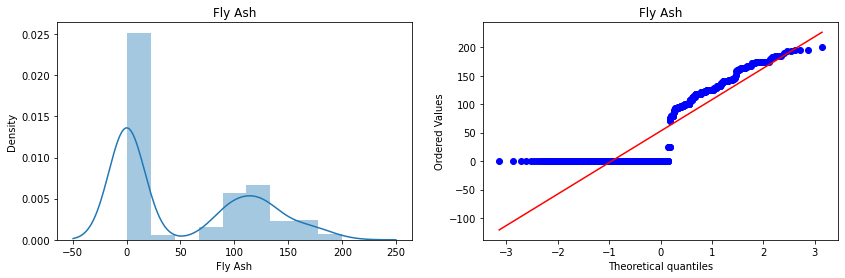

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


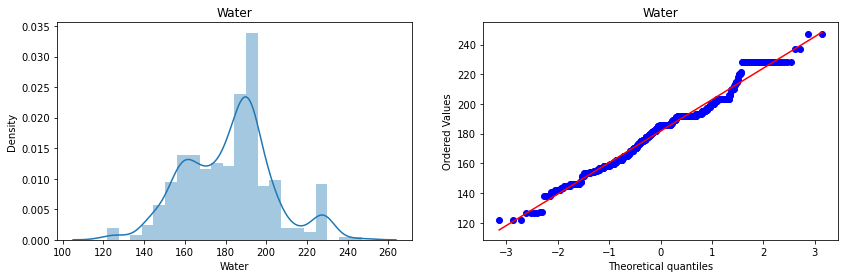

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


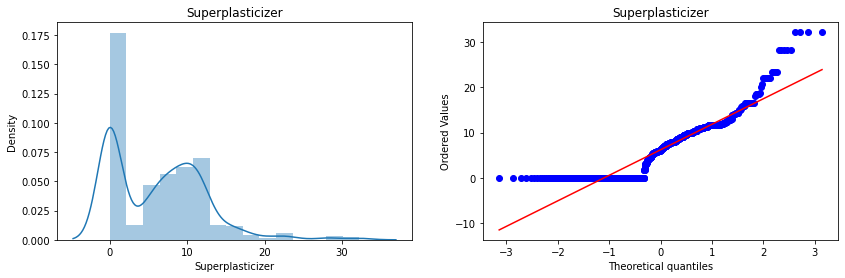

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


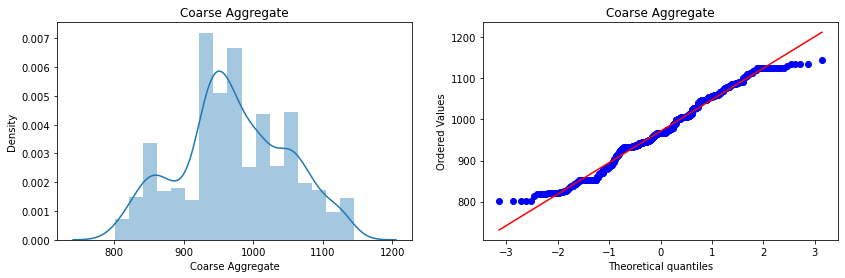

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


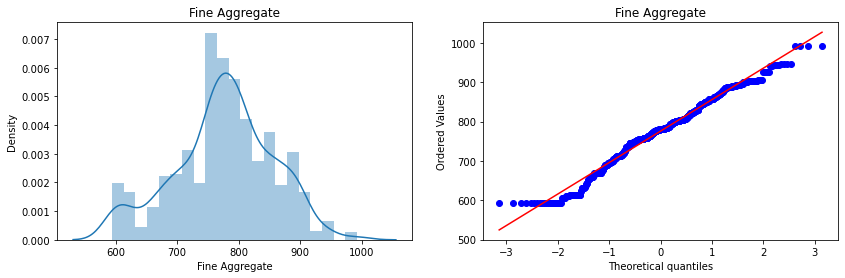

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


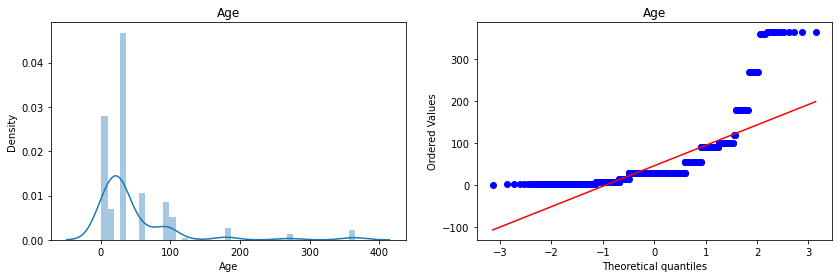

In [180]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist = 'norm', plot=plt)
    plt.title(col)
    
    plt.show()

# PowerTransformer(method = 'box-cox')

* remember box_cox can't be used on negative zero values , hence added a very small number (here - 0.000001) so as to able to implement box_cox

In [181]:
ptfr = PowerTransformer(method = 'box-cox')
X_train_trans = ptfr.fit_transform(X_train+0.000001)
X_test_trans = ptfr.fit_transform(X_test+0.000001)

In [182]:
lr.fit(X_train_trans,y_train)
y_pred_trans = lr.predict(X_test_trans)
print("R2 score with Box_cox transformation ",r2_score(y_test,y_pred_trans))

R2 score with Box_cox transformation  0.784736313592282


In [183]:
X_trans = ptfr.fit_transform(X+0.000001)
cv_score_lr_trans = cross_val_score(lr,X_trans,y,cv=10,scoring='r2')
print("Cross Validated R2 score with transformation ",cv_score_lr_trans.mean())

Cross Validated R2 score with transformation  0.6466764751014923


In [184]:
df_boxcox = pd.DataFrame({'cols' : X_train.columns, 'Box_Cox lambda':ptfr.lambdas_})
df_boxcox

,cols,Box_Cox lambda
0,Cement,0.172271
1,Blast Furnace Slag,0.025273
2,Fly Ash,-0.032412
3,Water,0.809568
4,Superplasticizer,0.099711
5,Coarse Aggregate,1.129168
6,Fine Aggregate,1.829625
7,Age,0.048975


In [185]:
X_train_trans

array([[ 1.02946902, -1.08559177, -0.88723568, ..., -0.06784272,
        -0.20165427, -2.53891057],
       [ 1.15106214,  0.89431845, -0.88723568, ..., -0.31797871,
         0.95649392,  0.70611994],
       [-0.42094186, -1.08559177, -0.88723568, ...,  1.8299889 ,
         0.69940553,  0.10244163],
       ...,
       [ 1.95164539, -1.08559177, -0.88723568, ..., -0.66806322,
        -0.72278419,  0.10244163],
       [-0.8394805 , -1.08559177,  1.13385191, ...,  1.5349638 ,
         0.31823714,  0.70611994],
       [ 1.05588417,  0.89768507, -0.88723568, ..., -1.56014482,
         1.99165736, -1.71360602]])

In [186]:
X_train_trans = pd.DataFrame(X_train_trans,columns=X_train.columns)
X_train_trans

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.029469,-1.085592,-0.887236,0.215148,-1.289117,-0.067843,-0.201654,-2.538911
1,1.151062,0.894318,-0.887236,-1.632343,0.827336,-0.317979,0.956494,0.706120
2,-0.420942,-1.085592,-0.887236,-0.018193,-1.289117,1.829989,0.699406,0.102442
3,0.992445,-1.085592,-0.887236,2.116766,-1.289117,-0.511172,-1.297357,1.130888
4,1.734762,0.723275,1.132426,0.905786,0.566784,-1.958075,-0.968238,-1.713606
...,...,...,...,...,...,...,...,...
819,0.606819,-1.085592,-0.887236,0.493052,-1.289117,0.088214,0.593148,1.768818
820,0.470790,0.944206,-0.887236,-1.751048,0.664213,2.047620,-0.422821,0.102442
821,1.951645,-1.085592,-0.887236,0.168610,0.702070,-0.668063,-0.722784,0.102442
822,-0.839481,-1.085592,1.133852,-0.915682,0.732109,1.534964,0.318237,0.706120


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


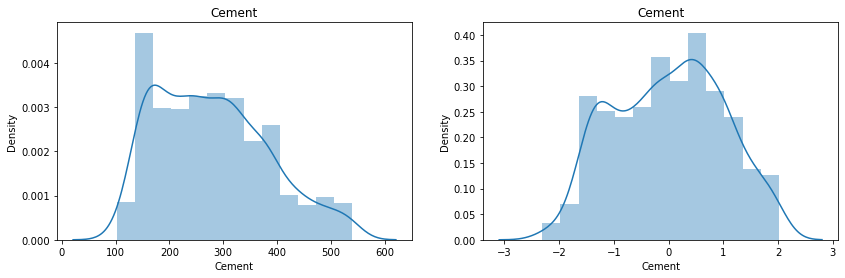

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


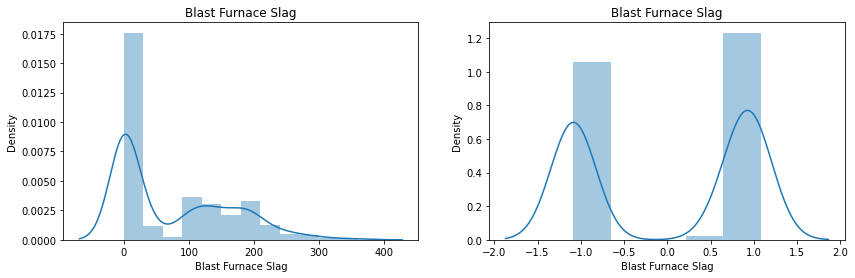

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


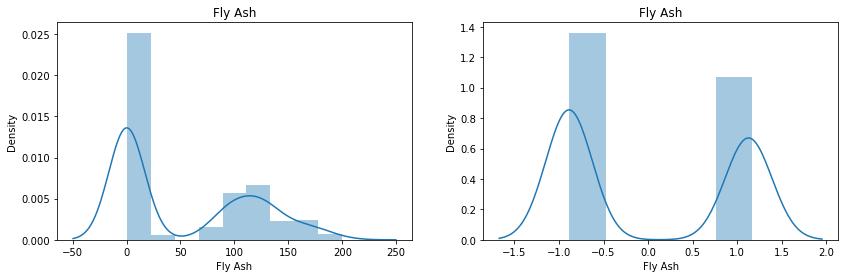

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


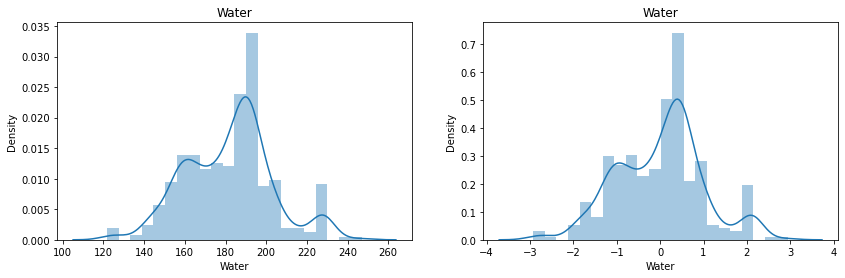

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


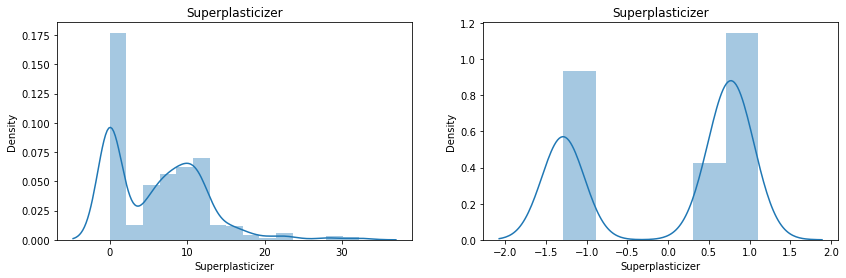

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


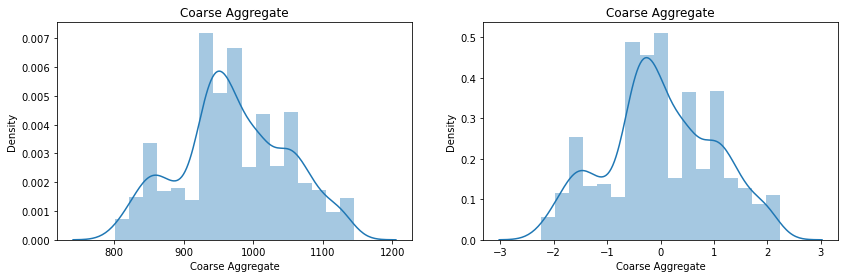

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


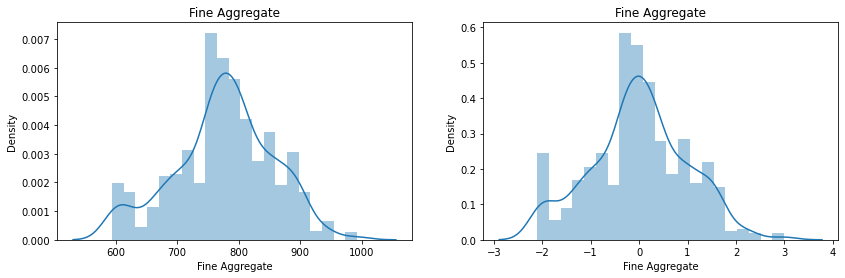

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


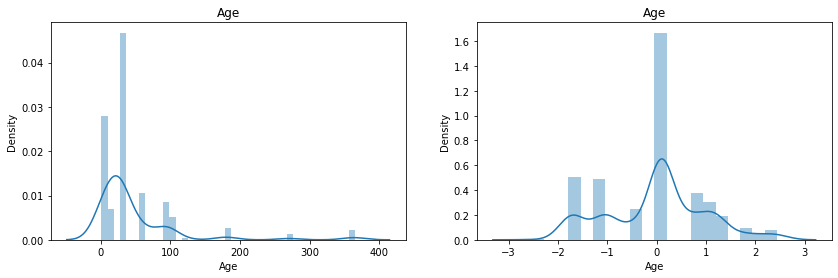

In [191]:

for col in X_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_trans[col])
    plt.title(col)
    
    
    plt.show()

# PowerTransformer()

* by default the used method is Yeo-Johnson 
* upgradation on box-cox as it can tackle negative and zero values

In [192]:
ptfr2 = PowerTransformer()

X_train_trans2 = ptfr2.fit_transform(X_train)
X_test_trans2 = ptfr2.fit_transform(X_test)

In [193]:
lr.fit(X_train_trans2,y_train)
y_pred_trans2 = lr.predict(X_test_trans2)
print("R2 score with Yeo_johnson transformation ",r2_score(y_test,y_pred_trans2))

R2 score with Yeo_johnson transformation  0.790281187196372


In [195]:
X_trans2 = ptfr2.fit_transform(X)
cv_score_lr_trans2 = cross_val_score(lr,X_trans2,y,cv=10,scoring='r2')
print("Cross Validated R2 score with transformation ",cv_score_lr_trans2.mean())

Cross Validated R2 score with transformation  0.6586548624046109


In [197]:
df_yeoj = pd.DataFrame({'cols' : X_train.columns, 'Yeo-Jonshon lambda':ptfr2.lambdas_})
df_yeoj

,cols,Yeo-Jonshon lambda
0,Cement,0.169544
1,Blast Furnace Slag,0.016633
2,Fly Ash,-0.136480
3,Water,0.808438
4,Superplasticizer,0.264160
5,Coarse Aggregate,1.129395
6,Fine Aggregate,1.830763
7,Age,0.001771


In [198]:
X_train_trans2 = pd.DataFrame(X_train_trans2,columns=X_train.columns)
X_train_trans2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.029551,-1.056336,-0.885315,0.215153,-1.213726,-0.067846,-0.201656,-2.328635
1,1.151159,0.823696,-0.885315,-1.632351,0.933836,-0.317982,0.956491,0.717017
2,-0.421098,-1.056336,-0.885315,-0.018190,-1.213726,1.829996,0.699402,0.102156
3,0.992521,-1.056336,-0.885315,2.116747,-1.213726,-0.511175,-1.297352,1.142812
4,1.734878,0.289354,1.147557,0.905793,-0.015897,-1.958065,-0.968235,-1.698931
...,...,...,...,...,...,...,...,...
819,0.606830,-1.056336,-0.885315,0.493059,-1.213726,0.088211,0.593144,1.768905
820,0.470775,0.980139,-0.885315,-1.751055,0.309273,2.047630,-0.422821,0.102156
821,1.951742,-1.056336,-0.885315,0.168614,0.445589,-0.668065,-0.722782,0.102156
822,-0.839620,-1.056336,1.152912,-0.915689,0.557553,1.534968,0.318233,0.717017


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


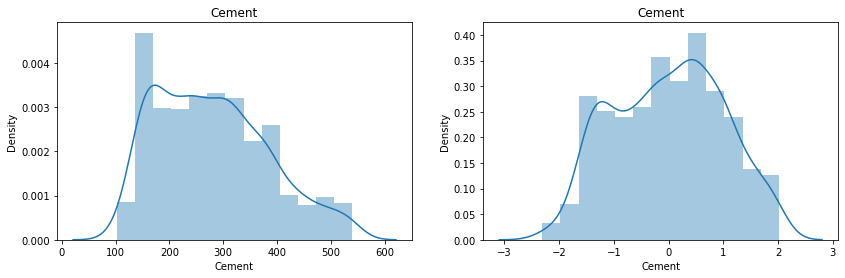

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


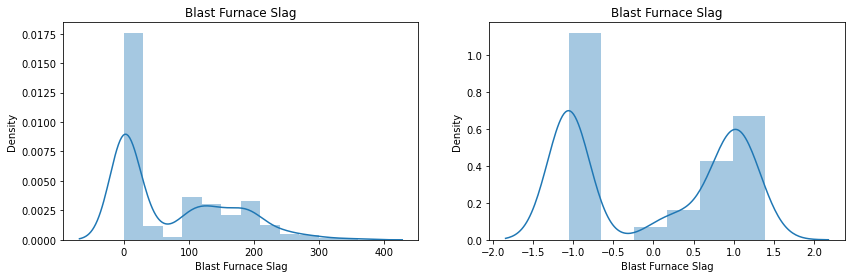

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


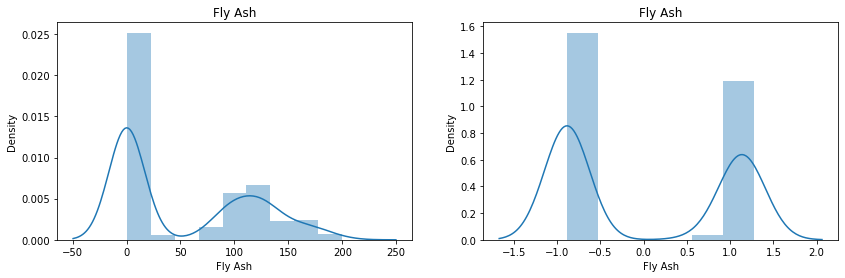

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


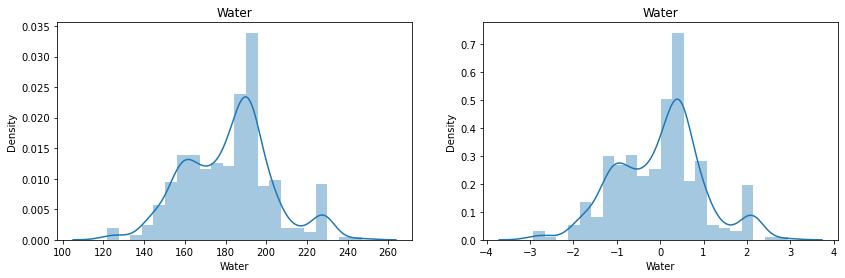

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


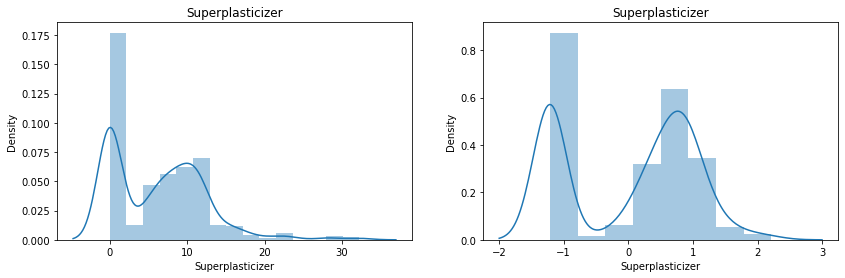

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


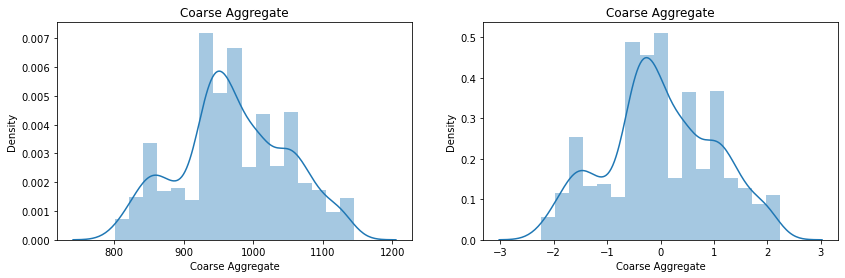

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


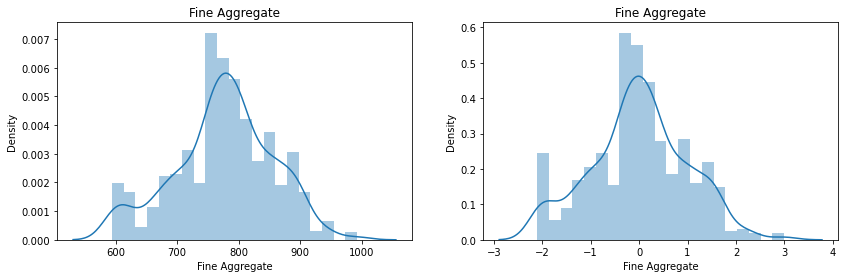

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


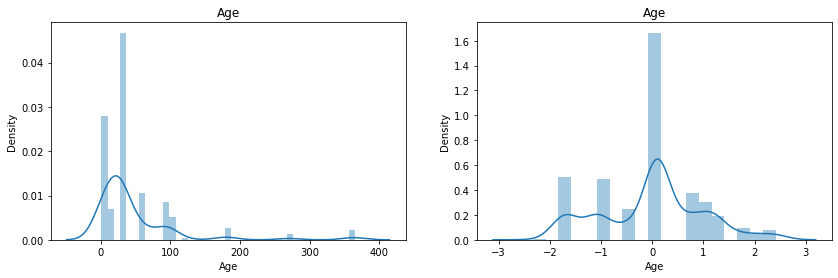

In [199]:
for col in X_train_trans2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_trans2[col])
    plt.title(col)
    
    
    plt.show()

# Comparison

In [200]:
df_compare = pd.DataFrame({'cols' : X_train.columns, 'Box_Cox lambda':ptfr.lambdas_,'Yeo-Jonshon lambda':ptfr2.lambdas_})

In [202]:
df_compare

,cols,Box_Cox lambda,Yeo-Jonshon lambda
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
